In [1]:
# !pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('Boston.csv')
print(data.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [21]:
data = data.drop(columns=['Unnamed: 0'])

In [22]:
X = data.drop('medv', axis=1)
Y = data['medv']

In [23]:
print(X.columns.tolist())
print("X has", X.shape[1], "features")


['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
X has 13 features


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from keras import Input
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [29]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 588.4551 - mae: 22.3628 - val_loss: 507.4918 - val_mae: 20.8905
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 565.0377 - mae: 21.7573 - val_loss: 469.0858 - val_mae: 19.9334
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 509.1785 - mae: 20.2717 - val_loss: 422.1608 - val_mae: 18.7191
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 477.9667 - mae: 19.5878 - val_loss: 365.7438 - val_mae: 17.2428
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 389.1895 - mae: 17.3582 - val_loss: 299.5006 - val_mae: 15.4115
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 339.1624 - mae: 15.9208 - val_loss: 225.6280 - val_mae: 13.1735
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.9473 - mae: 12.6585 - val_loss: 155.7616 - val_mae: 10.6665
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.1021 - mae: 10.6708 - val_loss: 99.5078 - val_mae: 8.1140
Epoch 9/100
11/11

In [30]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Test Mean Absolute Error: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9588 - mae: 2.3316 
Test Mean Absolute Error: 2.5217156410217285


In [31]:
predictions = model.predict(X_test)
print(predictions[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[[28.572252]
 [34.51485 ]
 [18.032331]
 [28.039532]
 [15.527019]]


In [33]:
import matplotlib.pyplot as plt

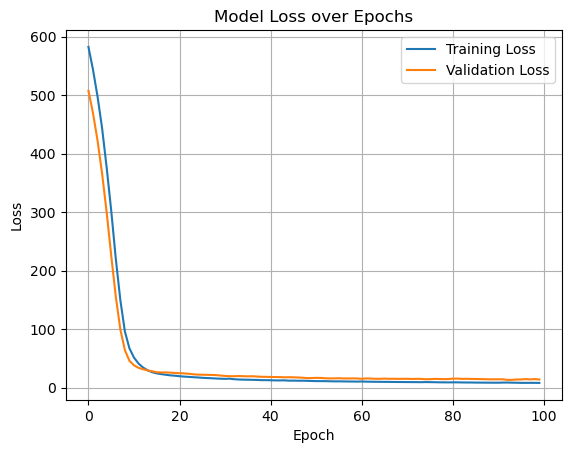

In [34]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Predict custom input
custom_input = np.array([[0.02729,	0,	7.07,	0,	0.469,	7.185,	61.1,	4.9671,	2,	242,	17.8,	392.83,	4.03]]) 

custom_input_scaled = scaler.transform(custom_input)
predicted_value = model.predict(custom_input_scaled)

print("\nPredicted House Price:", predicted_value[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Predicted House Price: 32.950615


c:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
